<a href="https://colab.research.google.com/github/Daniel-Loaiza/Coursera_Capstone/blob/master/Coursera_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
!conda install -c anaconda pandas-profiling
#! pip install pandas-profiling
import pandas_profiling
import seaborn as sns
%matplotlib inline

/bin/bash: conda: command not found


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
demographics = pd.read_csv('/content/drive/My Drive/Colab Notebooks/demographics.csv', sep=';',header=0)
demographics.head()

,borough,nta_code,nta_name,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,30-34_years,35-39_years,40-44_years,45-49_years,50-54_years,55-59_years,60-64_years,over_65_years,median_age,people_per_acre,households,"less_than_10,000",10000_to_14999,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
0,Bronx,BX31,Allerton-Pelham Gardens,28903,1679,1706,1763,2039,1964,1703,1798,1654,1937,2203,2027,1785,1619,5026,40,39.8,9587,836,348,797,773,1160,1764,1155,1562,765,427,61638,78489
1,Bronx,BX05,Bedford Park-Fordham North,54415,4517,4183,4058,4623,4693,4663,4262,3854,3830,3786,3490,2724,2029,3703,31,158.3,18636,3096,2319,3041,2063,2431,2728,1583,1077,149,149,29549,41324
2,Bronx,BX06,Belmont,27378,2076,2073,1969,3458,3937,2157,1846,1761,1580,1622,1229,966,756,1948,25,87.4,8643,1993,1202,1648,1215,836,950,366,329,90,14,21924,31783
3,Bronx,BX07,Bronxdale,35538,2458,2311,2404,2600,2629,2953,2636,2389,2491,2546,2364,1960,1575,4222,35,101.8,13361,2283,1192,1742,1199,1890,2128,1615,1018,238,56,36859,47292
4,Bronx,BX01,Claremont-Bathgate,31078,2890,2816,2769,3113,2658,2325,2012,1836,2078,2095,1830,1293,1070,2293,28,82.4,10299,2594,1744,1760,1211,1083,1193,323,327,56,8,20461,29720


In [3]:
demographics.describe()

,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,30-34_years,35-39_years,40-44_years,45-49_years,50-54_years,55-59_years,60-64_years,over_65_years,median_age,people_per_acre,households,"less_than_10,000",10000_to_14999,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
count,188.000000,188.00000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,43397.175532,2752.12766,2515.478723,2489.159574,2842.632979,3404.617021,3872.106383,3512.468085,3116.265957,3007.898936,2999.989362,2875.414894,2526.154255,2202.872340,5279.989362,36.122340,68.946809,16462.420213,1700.755319,1023.042553,1750.861702,1487.734043,1909.824468,2544.452128,1803.074468,2078.186170,939.824468,1224.664894,57002.489362,77808.877660
std,21288.062949,1695.80947,1496.808314,1459.440306,1574.371410,1886.482082,2462.683806,2113.358863,1704.685137,1531.520696,1486.184531,1430.098885,1305.172176,1184.907187,3013.103854,5.003841,44.558080,9239.891603,1248.342166,715.513733,1065.437156,893.651778,1076.642531,1415.221055,1041.592900,1430.129096,890.562915,2315.006940,24341.286390,38791.512605
min,13354.000000,506.00000,408.000000,326.000000,449.000000,798.000000,736.000000,742.000000,689.000000,743.000000,789.000000,830.000000,756.000000,756.000000,1505.000000,20.000000,5.600000,5559.000000,166.000000,87.000000,191.000000,371.000000,496.000000,782.000000,241.000000,201.000000,20.000000,8.000000,20334.000000,29720.000000
25%,27237.000000,1490.50000,1443.500000,1437.750000,1619.000000,1929.500000,2089.250000,1928.000000,1835.750000,1867.500000,1933.250000,1894.500000,1608.250000,1396.500000,3149.000000,33.000000,35.100000,9966.000000,742.500000,461.250000,930.000000,827.750000,1139.500000,1504.750000,1111.000000,1220.250000,426.500000,248.750000,39015.000000,54656.750000
50%,37897.000000,2386.00000,2228.500000,2197.500000,2568.000000,2956.000000,3081.500000,2893.000000,2555.500000,2520.000000,2586.500000,2406.500000,2076.000000,1863.500000,4675.000000,35.500000,60.850000,13940.000000,1410.000000,838.500000,1504.500000,1209.000000,1629.000000,2134.000000,1580.000000,1819.500000,760.000000,517.500000,53114.500000,70396.000000
75%,54244.750000,3579.25000,3242.750000,3263.750000,3717.250000,4527.000000,5252.750000,4611.000000,4034.500000,3778.500000,3812.000000,3572.250000,3088.750000,2698.750000,6467.250000,39.000000,97.825000,19989.500000,2304.250000,1345.000000,2235.250000,2066.500000,2494.250000,3117.500000,2328.500000,2462.500000,1068.750000,963.000000,71430.750000,89989.500000
max,132378.000000,14703.00000,11971.000000,10024.000000,9094.000000,10046.000000,11971.000000,11292.000000,10406.000000,10004.000000,9557.000000,9393.000000,9469.000000,9283.000000,22569.000000,56.000000,244.200000,66482.000000,6516.000000,3683.000000,5231.000000,4549.000000,5901.000000,7655.000000,6109.000000,9962.000000,6359.000000,15031.000000,155213.000000,311109.000000


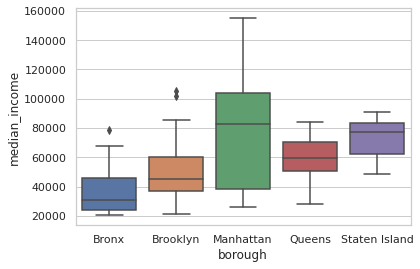

In [4]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x="borough", y="median_income", data=demographics)

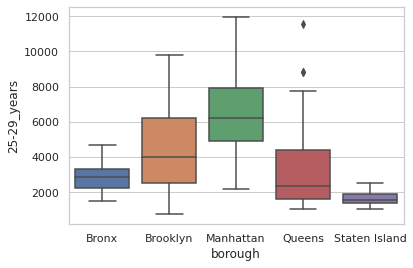

In [5]:
sns.set(style="whitegrid")
ax = sns.boxplot(x="borough", y="25-29_years", data=demographics)

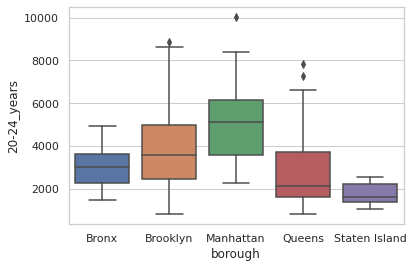

In [6]:
sns.set(style="whitegrid")
ax = sns.boxplot(x="borough", y="20-24_years", data=demographics)

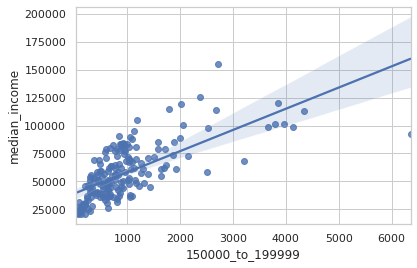

In [7]:
ax = sns.regplot(x="150000_to_199999", y="median_income", data=demographics)

In [8]:
import json # library to handle JSON files
with open('/content/drive/My Drive/Colab Notebooks/nyu_2451_34572-geojson.json') as json_data:
    newyork_data = json.load(json_data)

# Tranform the data into a pandas dataframe
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

neighborhoods_data = newyork_data['features']

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
# neighborhoods

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
neighborhoods.head()    

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [9]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

#pd.read_csv('https://geo.nyu.edu/catalog/nyu_2451_34572/')

Data downloaded!


In [10]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [0]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

In [12]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
# manhattan_data.head()

address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [13]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [14]:
# Define Foursquare Credentials and Version
CLIENT_ID = 'KB1MGMXSFCU5NXWQWFVLPFNXZE3VRN3G5WC05TC0YNPUYDUO' # your Foursquare ID
CLIENT_SECRET = 'H1X3QY13IMSN3H1BTZQMKOOZAG2YAQXQWW1CNOND4RHTJVY3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KB1MGMXSFCU5NXWQWFVLPFNXZE3VRN3G5WC05TC0YNPUYDUO
CLIENT_SECRET:H1X3QY13IMSN3H1BTZQMKOOZAG2YAQXQWW1CNOND4RHTJVY3


In [0]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [0]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
# type your answer here

manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [18]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3220, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


In [19]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,77,77,77,77,77,77
Carnegie Hill,94,94,94,94,94,94
Central Harlem,41,41,41,41,41,41
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,40,40,40,40,40,40
East Village,100,100,100,100,100,100


In [20]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Acupuncturist,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soba Restaurant,Soccer Field,Social Club,Soup 

In [21]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,Acupuncturist,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soba Restaurant,Soccer Field,Social Club,Soup 

In [0]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [23]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Coffee Shop,Hotel,Gym,Memorial Site,Pizza Place,Food Court,Clothing Store,Boat or Ferry,Sandwich Place
1,Carnegie Hill,Coffee Shop,Café,Yoga Studio,Gym / Fitness Center,Bookstore,Japanese Restaurant,Pizza Place,Bakery,Italian Restaurant,Gym
2,Central Harlem,Seafood Restaurant,Chinese Restaurant,French Restaurant,Bar,African Restaurant,American Restaurant,Gym / Fitness Center,Gym,Fried Chicken Joint,Tapas Restaurant
3,Chelsea,Coffee Shop,Art Gallery,American Restaurant,Hotel,Italian Restaurant,Ice Cream Shop,Bakery,Market,Cocktail Bar,Cycle Studio
4,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Bakery,Spa,Hotpot Restaurant,Optical Shop,Vietnamese Restaurant,Salon / Barbershop,Malay Restaurant


In [24]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 0, 1, 1, 1, 1, 3, 0, 1], dtype=int32)

In [25]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,4,Sandwich Place,Coffee Shop,Gym,Yoga Studio,Shopping Mall,Steakhouse,Seafood Restaurant,Supplement Shop,Donut Shop,Bank
1,Manhattan,Chinatown,40.715618,-73.994279,1,Chinese Restaurant,Cocktail Bar,American Restaurant,Bakery,Spa,Hotpot Restaurant,Optical Shop,Vietnamese Restaurant,Salon / Barbershop,Malay Restaurant
2,Manhattan,Washington Heights,40.851903,-73.936900,3,Café,Bakery,Grocery Store,Mobile Phone Shop,Chinese Restaurant,Spanish Restaurant,Coffee Shop,Mexican Restaurant,Latin American Restaurant,Donut Shop
3,Manhattan,Inwood,40.867684,-73.921210,3,Mexican Restaurant,Pizza Place,Restaurant,Café,Lounge,Frozen Yogurt Shop,Deli / Bodega,Chinese Restaurant,Bakery,Park
4,Manhattan,Hamilton Heights,40.823604,-73.949688,3,Pizza Place,Café,Mexican Restaurant,Coffee Shop,Deli / Bodega,Bakery,School,Caribbean Restaurant,Sandwich Place,Chinese Restaurant


In [26]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Examing Clusters

In [27]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Central Harlem,Seafood Restaurant,Chinese Restaurant,French Restaurant,Bar,African Restaurant,American Restaurant,Gym / Fitness Center,Gym,Fried Chicken Joint,Tapas Restaurant
9,Yorkville,Italian Restaurant,Gym,Coffee Shop,Bar,Pizza Place,Deli / Bodega,Japanese Restaurant,Mexican Restaurant,Sushi Restaurant,Wine Shop
12,Upper West Side,Italian Restaurant,Coffee Shop,Bar,Bakery,Mediterranean Restaurant,Shoe Store,Sports Bar,Sushi Restaurant,Bagel Shop,Dessert Shop
13,Lincoln Square,Café,Theater,Plaza,Italian Restaurant,Concert Hall,Performing Arts Venue,Indie Movie Theater,Gym / Fitness Center,Wine Shop,American Restaurant
18,Greenwich Village,Italian Restaurant,Café,Sushi Restaurant,American Restaurant,Gym,Indian Restaurant,French Restaurant,Clothing Store,Seafood Restaurant,Chinese Restaurant
19,East Village,Bar,Pizza Place,Ice Cream Shop,Wine Bar,Coffee Shop,Mexican Restaurant,Cocktail Bar,Speakeasy,Ramen Restaurant,Italian Restaurant
20,Lower East Side,Chinese Restaurant,Coffee Shop,Pizza Place,Cocktail Bar,Art Gallery,Ramen Restaurant,Bakery,Café,Clothing Store,Rock Club
21,Tribeca,Park,Italian Restaurant,Café,American Restaurant,Wine Bar,Coffee Shop,Spa,Playground,Basketball Court,Scenic Lookout
23,Soho,Italian Restaurant,Clothing Store,Coffee Shop,Bakery,Boutique,Mediterranean Restaurant,Hotel,Salon / Barbershop,Vegetarian / Vegan Restaurant,Café
24,West Village,Italian Restaurant,New American Restaurant,Wine Bar,American Restaurant,Park,Jazz Club,Cocktail Bar,Bakery,Coffee Shop,Theater


In [28]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Bakery,Spa,Hotpot Restaurant,Optical Shop,Vietnamese Restaurant,Salon / Barbershop,Malay Restaurant
8,Upper East Side,Italian Restaurant,Coffee Shop,Bakery,Gym / Fitness Center,Yoga Studio,Pizza Place,French Restaurant,Juice Bar,Exhibit,Hotel
10,Lenox Hill,Italian Restaurant,Coffee Shop,Sushi Restaurant,Pizza Place,Cocktail Bar,Gym / Fitness Center,Burger Joint,Gym,Café,Thai Restaurant
11,Roosevelt Island,Playground,Sandwich Place,Liquor Store,Supermarket,Food & Drink Shop,Metro Station,Soccer Field,Farmers Market,School,Dry Cleaner
14,Clinton,Theater,Gym / Fitness Center,Italian Restaurant,Coffee Shop,Spa,Gym,American Restaurant,Sandwich Place,Hotel,Cocktail Bar
15,Midtown,Hotel,Steakhouse,Coffee Shop,Clothing Store,Sporting Goods Shop,Sandwich Place,Theater,Café,American Restaurant,Gym
16,Murray Hill,Coffee Shop,Sandwich Place,Hotel,Bar,Gym / Fitness Center,American Restaurant,Restaurant,Italian Restaurant,Sushi Restaurant,Japanese Restaurant
17,Chelsea,Coffee Shop,Art Gallery,American Restaurant,Hotel,Italian Restaurant,Ice Cream Shop,Bakery,Market,Cocktail Bar,Cycle Studio
22,Little Italy,Bakery,Hotel,Café,Bubble Tea Shop,Chinese Restaurant,Cocktail Bar,Thai Restaurant,Mediterranean Restaurant,Spa,Salon / Barbershop
27,Gramercy,Bar,Italian Restaurant,Pizza Place,American Restaurant,Thai Restaurant,Mexican Restaurant,Ice Cream Shop,Cocktail Bar,Playground,Grocery Store


In [29]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Stuyvesant Town,Boat or Ferry,Park,Bar,Fountain,Harbor / Marina,Pet Service,Coffee Shop,Cocktail Bar,Farmers Market,Gas Station


In [33]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Washington Heights,Café,Bakery,Grocery Store,Mobile Phone Shop,Chinese Restaurant,Spanish Restaurant,Coffee Shop,Mexican Restaurant,Latin American Restaurant,Donut Shop
3,Inwood,Mexican Restaurant,Pizza Place,Restaurant,Café,Lounge,Frozen Yogurt Shop,Deli / Bodega,Chinese Restaurant,Bakery,Park
4,Hamilton Heights,Pizza Place,Café,Mexican Restaurant,Coffee Shop,Deli / Bodega,Bakery,School,Caribbean Restaurant,Sandwich Place,Chinese Restaurant
5,Manhattanville,Coffee Shop,Seafood Restaurant,Park,Chinese Restaurant,Italian Restaurant,Mexican Restaurant,Supermarket,Dumpling Restaurant,Café,Climbing Gym
7,East Harlem,Mexican Restaurant,Bakery,Thai Restaurant,Park,Deli / Bodega,Latin American Restaurant,French Restaurant,Steakhouse,Street Art,Restaurant
26,Morningside Heights,Park,Coffee Shop,American Restaurant,Bookstore,Burger Joint,Deli / Bodega,Food Truck,Tennis Court,New American Restaurant,Salad Place
36,Tudor City,Park,Café,Mexican Restaurant,Coffee Shop,Deli / Bodega,Diner,Greek Restaurant,Asian Restaurant,Garden,Thai Restaurant


In [32]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Sandwich Place,Coffee Shop,Gym,Yoga Studio,Shopping Mall,Steakhouse,Seafood Restaurant,Supplement Shop,Donut Shop,Bank


After we have identified the Clusters of interest and 

In [35]:
brooklyn_data = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
# brooklyn_data.head()

address = 'Brooklyn, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(latitude, longitude))

# Define Foursquare Credentials and Version
CLIENT_ID = 'KB1MGMXSFCU5NXWQWFVLPFNXZE3VRN3G5WC05TC0YNPUYDUO' # your Foursquare ID
CLIENT_SECRET = 'H1X3QY13IMSN3H1BTZQMKOOZAG2YAQXQWW1CNOND4RHTJVY3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

LIMIT = 100 # limit of number of venues returned by Foursquare API

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

brooklyn_venues = getNearbyVenues(names=brooklyn_data['Neighborhood'],
                                   latitudes=brooklyn_data['Latitude'],
                                   longitudes=brooklyn_data['Longitude']
                                  )

print(brooklyn_venues.shape)
brooklyn_venues.head()
brooklyn_venues.groupby('Neighborhood').count()

# one hot encoding
brooklyn_onehot = pd.get_dummies(brooklyn_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
brooklyn_onehot['Neighborhood'] = brooklyn_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [brooklyn_onehot.columns[-1]] + list(brooklyn_onehot.columns[:-1])
brooklyn_onehot = brooklyn_onehot[fixed_columns]

brooklyn_onehot.head()

brooklyn_grouped = brooklyn_onehot.groupby('Neighborhood').mean().reset_index()
brooklyn_grouped

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = brooklyn_grouped['Neighborhood']

for ind in np.arange(brooklyn_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(brooklyn_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

The geograpical coordinate of Brooklyn are 40.6501038, -73.9495823.
Your credentails:
CLIENT_ID: KB1MGMXSFCU5NXWQWFVLPFNXZE3VRN3G5WC05TC0YNPUYDUO
CLIENT_SECRET:H1X3QY13IMSN3H1BTZQMKOOZAG2YAQXQWW1CNOND4RHTJVY3
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Ditmas Park
Wingate
Rugby
Remsen Village
New Lots
Paerdegat Basin
Mill Basin
Fulton Ferry
V

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
59,Paerdegat Basin,Food,Moving Target,Asian Restaurant,Harbor / Marina,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market


In [0]:
# set number of clusters
kclusters = 5

brooklyn_grouped_clustering = brooklyn_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(brooklyn_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

brooklyn_merged = brooklyn_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
brooklyn_merged = brooklyn_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

brooklyn_merged.head() # check the last columns!

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)



In [0]:
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(brooklyn_merged['Latitude'], brooklyn_merged['Longitude'], brooklyn_merged['Neighborhood'], brooklyn_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [0]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 0, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

In [39]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 1, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bay Ridge,Italian Restaurant,Pizza Place,Spa,American Restaurant,Greek Restaurant,Bar,Bagel Shop,Thai Restaurant,Ice Cream Shop,Playground
1,Bensonhurst,Grocery Store,Chinese Restaurant,Flower Shop,Ice Cream Shop,Pizza Place,Sushi Restaurant,Donut Shop,Italian Restaurant,Noodle House,Liquor Store
2,Sunset Park,Pizza Place,Bank,Bakery,Latin American Restaurant,Mexican Restaurant,Mobile Phone Shop,Gym,Fried Chicken Joint,Pharmacy,Café
3,Greenpoint,Bar,Pizza Place,Coffee Shop,Cocktail Bar,Yoga Studio,Deli / Bodega,French Restaurant,Sushi Restaurant,Restaurant,Furniture / Home Store
4,Gravesend,Italian Restaurant,Pizza Place,Bus Station,Lounge,Bakery,Chinese Restaurant,Martial Arts Dojo,Men's Store,Metro Station,Furniture / Home Store
5,Brighton Beach,Restaurant,Beach,Eastern European Restaurant,Russian Restaurant,Pharmacy,Gourmet Shop,Bank,Mobile Phone Shop,Sushi Restaurant,Other Great Outdoors
6,Sheepshead Bay,Dessert Shop,Turkish Restaurant,Sandwich Place,Yoga Studio,Karaoke Bar,Deli / Bodega,Hotel,Creperie,Restaurant,Outlet Store
7,Manhattan Terrace,Pizza Place,Donut Shop,Ice Cream Shop,Coffee Shop,Bakery,Grocery Store,Steakhouse,Convenience Store,Cosmetics Shop,Bank
8,Flatbush,Chinese Restaurant,Caribbean Restaurant,Coffee Shop,Pharmacy,Mexican Restaurant,Juice Bar,Middle Eastern Restaurant,Sandwich Place,Grocery Store,Metro Station
9,Crown Heights,Pizza Place,Bookstore,Café,Museum,Pharmacy,Electronics Store,Convenience Store,Coffee Shop,Farmers Market,Salon / Barbershop


In [38]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 2, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
39,Sea Gate,Spa,Beach,Bus Station,Video Store,Fish Market,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop


In [37]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 3, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Mill Island,Locksmith,Pool,Fish Market,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Women's Store


In [36]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 4, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
59,Paerdegat Basin,Food,Moving Target,Asian Restaurant,Harbor / Marina,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market
